Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC AUC Score: 0.99737962659679


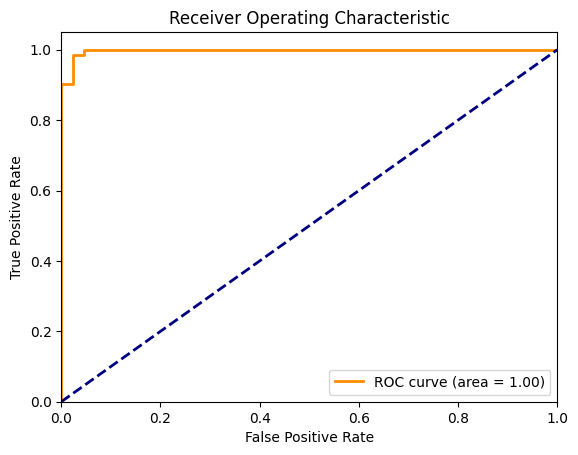

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities and classes
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_plot = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_plot)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Explanation of the Sigmoid Function in Logistic Regression

The sigmoid function, also known as the logistic function, is a crucial component of logistic regression. It's an S-shaped curve that maps any real-valued number to a value between 0 and 1.

The formula for the sigmoid function is:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Where $z$ is the input to the function, typically the linear combination of the features and their weights ($z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$).

In logistic regression, the sigmoid function is used to predict the probability that a given instance belongs to a particular class (e.g., the probability of a tumor being malignant). The output of the sigmoid function is interpreted as the probability $P(y=1|x)$, where $y=1$ represents the positive class and $x$ represents the input features.

- If the output of the sigmoid function is close to 1, it indicates a high probability that the instance belongs to the positive class.
- If the output is close to 0, it indicates a low probability of belonging to the positive class.
- A threshold (usually 0.5) is then applied to the sigmoid output to make a binary classification decision. If the probability is above the threshold, the instance is classified as positive; otherwise, it's classified as negative.

Essentially, the sigmoid function transforms the linear output of the model into a probability, making logistic regression suitable for binary classification problems.

### Tuning the Classification Threshold

The default classification threshold in logistic regression is typically 0.5. This means that if the predicted probability is greater than or equal to 0.5, the instance is classified as belonging to the positive class (1), and otherwise to the negative class (0).

However, you can tune this threshold to optimize for different evaluation metrics, such as precision or recall, depending on the specific problem and the costs associated with false positives and false negatives.

To tune the threshold, you can:

1.  **Calculate predicted probabilities:** Get the probability estimates for the positive class on your test set using `model.predict_proba(X_test_scaled)[:, 1]`.
2.  **Iterate through potential thresholds:** Choose a range of threshold values between 0 and 1.
3.  **Evaluate metrics for each threshold:** For each threshold, classify the instances based on whether their predicted probability is above or below the threshold. Then, calculate the desired evaluation metric (e.g., precision, recall, F1-score) using the predicted classes and the true labels.
4.  **Select the optimal threshold:** Choose the threshold that yields the best performance based on your chosen metric.

For example, if you want to maximize recall (minimize false negatives), you might choose a lower threshold. If you want to maximize precision (minimize false positives), you might choose a higher threshold.

Here's an example of how you could evaluate precision and recall for different thresholds:

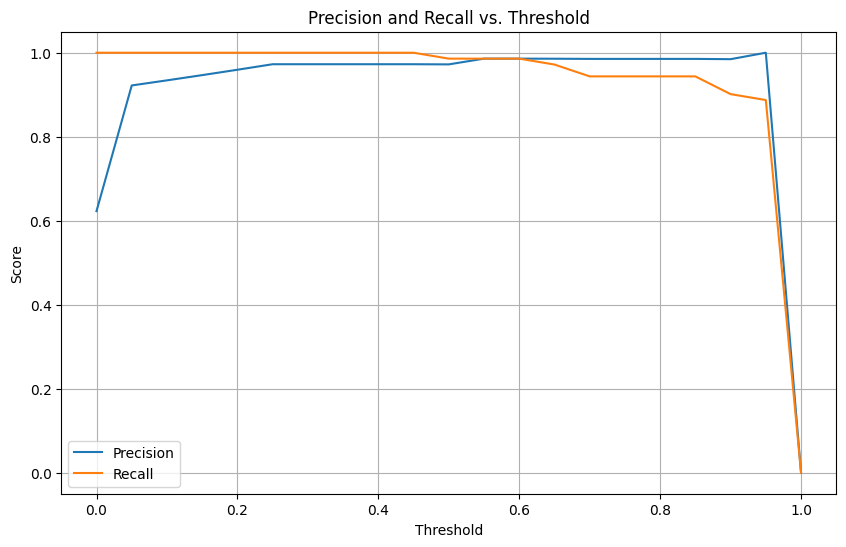

In [12]:
# Example of tuning the threshold
thresholds = np.arange(0, 1.01, 0.05)
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_tuned = (y_prob >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_tuned, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_tuned, zero_division=0))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()